In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mysql.connector

In [2]:
mydb = mysql.connector.connect(
    host = "mysqle8c2.netcup.net",
    user = "k207746_python_brunoyam",
    passwd  = "python2023%",
    db = "k207746_python_brunoyam",
)

print(mydb)

In [3]:
cursor = mydb.cursor()

In [4]:
cursor.execute("SHOW TABLES")
print(cursor)

CMySQLCursor: SHOW TABLES


In [5]:
for x in cursor:
    print(x)

('courses',)
('courses_students',)
('locations',)
('messages',)
('students',)
('teachers',)


In [6]:
cursor.execute("SELECT count(*) FROM courses")

In [7]:
for x in cursor:
    print(x)

(52,)


In [8]:
cursor.execute("SELECT * FROM courses WHERE title = 'Algorithmen'")

In [9]:
print(cursor)

CMySQLCursor: SELECT * FROM courses WHERE title = 'Alg..


In [10]:
for x in cursor:
    print(x)

(1, datetime.datetime(2016, 12, 8, 21, 4, 21), datetime.datetime(2016, 12, 8, 21, 4, 21), 'Algorithmen', 1, datetime.datetime(2017, 2, 28, 21, 4, 21), datetime.datetime(2017, 2, 28, 21, 4, 21), 3)


In [11]:
cursor.execute( "SELECT * FROM courses WHERE title = 'Algorithmen'" )
print(cursor)

CMySQLCursor: SELECT * FROM courses WHERE title = 'Alg..


In [12]:
for x in cursor:
    print(x)

(1, datetime.datetime(2016, 12, 8, 21, 4, 21), datetime.datetime(2016, 12, 8, 21, 4, 21), 'Algorithmen', 1, datetime.datetime(2017, 2, 28, 21, 4, 21), datetime.datetime(2017, 2, 28, 21, 4, 21), 3)


In [13]:
cursor.execute("SELECT COUNT(DISTINCT firstname) FROM students WHERE 1")
print(cursor)
for x in cursor:
    print(x)

CMySQLCursor: SELECT COUNT(DISTINCT firstname) FROM st..
(638,)


In [14]:
cursor.execute(" SELECT firstname, COUNT(*) AS c FROM students GROUP BY firstname ORDER BY c DESC, firstname ASC ")
print(cursor)
for x in  cursor:
    print(x)
    

CMySQLCursor:  SELECT firstname, COUNT(*) AS c FROM st..
('Caroline', 5)
('Dietmar', 5)
('Kristina', 5)
('Ralf', 5)
('Alwin', 4)
('Andrzej', 4)
('Anita', 4)
('Dierk', 4)
('Elli', 4)
('Helena', 4)
('Ivonne', 4)
('Jacqueline', 4)
('Jonas', 4)
('Mehmet', 4)
('Peggy', 4)
('Sigmund', 4)
('Agathe', 3)
('Alfred', 3)
('Almut', 3)
('Anneliese', 3)
('Annika', 3)
('Antonio', 3)
('Artur', 3)
('Astrid', 3)
('Brigitte', 3)
('Claudio', 3)
('Daniel', 3)
('David', 3)
('Dirk', 3)
('Eckhardt', 3)
('Edeltraut', 3)
('Ewald', 3)
('Gertrud', 3)
('Gudrun', 3)
('Halil', 3)
('Harri', 3)
('Heinz-Joachim', 3)
('Hella', 3)
('Henrik', 3)
('Hiltrud', 3)
('Ignaz', 3)
('Ilse', 3)
('Inna', 3)
('Josefine', 3)
('Judith', 3)
('Kai-Uwe', 3)
('Karl Heinz', 3)
('Karl-Otto', 3)
('Kathleen', 3)
('Katja', 3)
('Katrin', 3)
('Klaus Peter', 3)
('Klaus-Dieter', 3)
('Kornelia', 3)
('Krystyna', 3)
('Lisa', 3)
('Lorenz', 3)
('Ludmila', 3)
('Lydia', 3)
('Madeleine', 3)
('Malte', 3)
('Margarethe', 3)
('Margret', 3)
('Marianne', 3)
('Mar

In [15]:
cursor.execute( "SELECT firstname, lastname, courses.title FROM students LEFT JOIN courses_students ON students.id = courses_students.student_id LEFT JOIN courses ON courses_students.course_id = courses.id ORDER BY firstname" )
print(cursor)

CMySQLCursor: SELECT firstname, lastname, courses.titl..


In [16]:
for x in cursor:
    print(x)

('Achim', 'Naumann', 'Datenstrukturen')
('Achim', 'Wilke', 'Diskrete Wahrscheinlichkeitstheorie')
('Achim', 'Wilke', 'Interview-Training')
('Achim', 'Wilke', 'Datenstrukturen')
('Achim', 'Wilke', 'PHP')
('Adalbert', 'Paul', 'Datenbankoptimierung')
('Adalbert', 'Paul', 'Datenstrukturen')
('Adalbert', 'Paul', 'Physikalische Simulationen')
('Adalbert', 'Paul', 'Webservices')
('Adalbert', 'Stock', None)
('Adele', 'Hartmann', 'Physikalische Simulationen')
('Adele', 'Hartmann', 'Programmieren')
('Adele', 'Hartmann', 'Phsychologie')
('Adele', 'Wulf', 'Maschinelles Lernen')
('Adele', 'Wulf', 'Interview-Training')
('Adele', 'Wulf', 'Biologie für Informatiker')
('Adele', 'Wulf', 'Angewandte Mathematik für Informatiker')
('Adelheid', 'Weidner', 'HTML')
('Adelheid', 'Weidner', 'Physik für Informatiker')
('Adelheid', 'Weidner', 'MySQL')
('Adolf', 'Wunderlich', None)
('Adolf', 'Benz', 'Physikalische Simulationen')
('Adrian', 'Kunz', 'Algorithmen')
('Adrian', 'Kunz', 'Prozessorarchitekturen')
('Adria

In [17]:
cursor.execute("SELECT AVG (age) FROM students")
print(cursor)

CMySQLCursor: SELECT AVG (age) FROM students


In [18]:
for x in cursor:
    print(x)

(Decimal('21.5100'),)


In [19]:
cursor.execute("SELECT COUNT(*) FROM students WHERE age = 20")
print(cursor)

CMySQLCursor: SELECT COUNT(*) FROM students WHERE age ..


In [20]:
for x in cursor:
    print(x)

(128,)


In [21]:
cursor.execute("SELECT MIN(age) FROM students")
print(cursor)

CMySQLCursor: SELECT MIN(age) FROM students


In [22]:
for x in cursor:
    print(x)
   

(19,)


In [23]:
cursor.execute("SELECT firstname, age FROM students WHERE age IS NOT NULL")
result = cursor.fetchall



Name of Students =  ['Renate', 'Helena', 'Karoline', 'Franz Josef', 'Tim', 'Sonja', 'Fridolin', 'Jonas', 'Heidi', 'Konstantinos', 'Rosita', 'Cornelius', 'Inna', 'Kevin', 'Theo', 'Nancy', 'Angelo', 'Verena', 'Silvia', 'Gregor', 'Christos', 'Siegmund', 'Marie', 'Heidi', 'Babette', 'Gero', 'Tanja', 'Isabelle', 'Natalia', 'Sandra', 'Udo', 'Peter', 'Peggy', 'Juri', 'Gundula', 'Axel', 'Marianne', 'Ewald', 'Bertram', 'Halil', 'Samuel', 'Judith', 'Isabel', 'Ilse', 'Anita', 'Edwin', 'Larissa', 'Elli', 'Rosemarie', 'Imke', 'Silvana', 'Bernhard', 'Minna', 'Siegrid', 'Magdalena', 'Almut', 'Philipp', 'Tamara', 'Harry', 'Ricarda', 'Hanns', 'Daniel', 'Albrecht', 'Hartwig', 'Klaus Peter', 'Claus-Dieter', 'Ramazan', 'Eberhard', 'Harri', 'Irmhild', 'Torsten', 'Viktoria', 'Antonia', 'Gerhild', 'Constanze', 'Julius', 'Pascal', 'Nikolaus', 'Heidrun', 'Guiseppe', 'Kirstin', 'Carla', 'Johanna', 'Karlheinz', 'Franz', 'Gert', 'Hans-Werner', 'Anatoli', 'Alex', 'Arnd', 'Hubert', 'Jaqueline', 'Horst', 'Annika', '

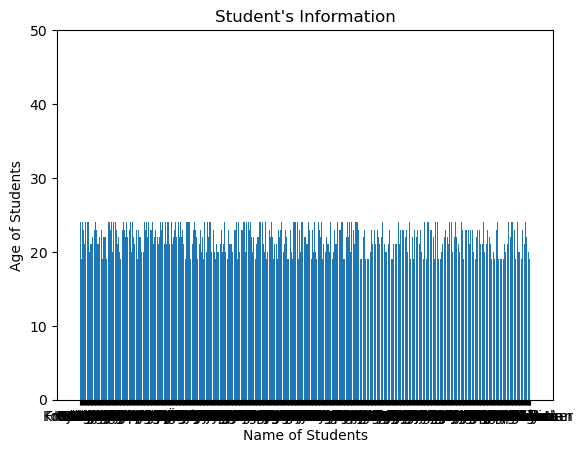

In [24]:
firstname = []
age=[]

for x in cursor:
    firstname.append(x[0])
    age.append(x[1])
     
print("Name of Students = ", firstname)
print("Age of Students = ", age)
  
 
# Визуализация данных с использованием Matplotlib
plt.bar(firstname, age)
plt.ylim(0, 50)
plt.xlabel("Name of Students")
plt.ylabel("Age of Students")
plt.title("Student's Information")
plt.show()

In [25]:
cursor.close()

True